In [1]:
import spacy
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter


In [2]:
# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Function to extract entities from text
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


In [3]:
# Function to fetch text content from a webpage
def scrape_webpage(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract text from paragraphs
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])

    return text


In [4]:
# Function to visualize entity distribution
def visualize_entities(entities):
    # Count entity types
    entity_counts = Counter([label for _, label in entities])

    # Plot the bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(entity_counts.keys(), entity_counts.values(), color='teal')
    plt.title("Entity Type Distribution")
    plt.xlabel("Entity Types")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


Enter '1' for text input or '2' for webpage scraping: 1
Enter your text for NER extraction:
The Forgotten Letter  A dusty box sat untouched in the corner of Aarav's attic. He wasn’t one for nostalgia, but after his grandmother's passing, the house felt quieter — like it was waiting for something. On a restless evening, Aarav climbed the creaky steps to the attic and opened the box.  Inside were yellowed papers, a rusted locket, and an envelope marked "For Aarav" in his grandmother’s handwriting. Curious, he tore it open.  "My dearest Aarav, If you're reading this, it means I’m gone. But there’s something I never told you...  The letter revealed a family secret — his grandmother once had a twin sister, Meera, who had vanished at the age of 18. No one knew what had happened, but the letter hinted at an old bookstore on the outskirts of Pune — the last place Meera was seen.  The next day, Aarav found himself outside the bookstore. It smelled of ink and aging paper. An elderly woman sat at

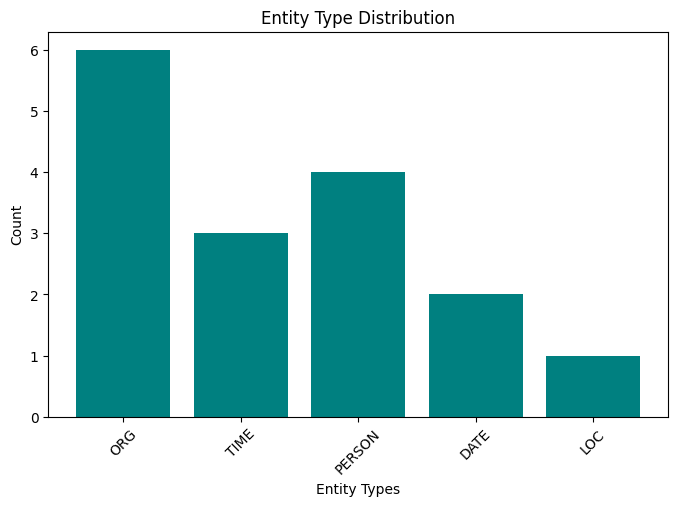

In [6]:
# User Input or Webpage
choice = input("Enter '1' for text input or '2' for webpage scraping: ")

if choice == '1':
    text = input("Enter your text for NER extraction:\n")
elif choice == '2':
    url = input("Enter the URL of the webpage: ")
    text = scrape_webpage(url)
else:
    print("Invalid choice. Exiting...")
    exit()

# Extract and display entities
entities = extract_entities(text)
print("\nExtracted Entities:")
for entity, label in entities:
    print(f"{entity} --> {label}")

# Visualize entity distribution
visualize_entities(entities)
